# SP23-BBD-017
# HAMZA YASEEN
# ML LAB # 05

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA
# Data Visualization
# Linear Regression 

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
data.shape

(30, 2)

In [7]:
data.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [8]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
data.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

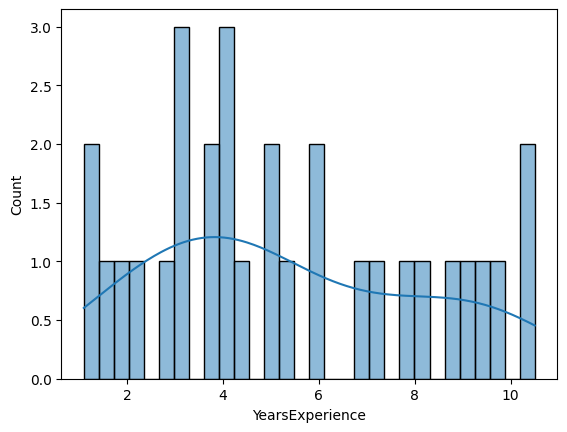

In [14]:
sns.histplot(data["YearsExperience"], bins=30,kde=True)
plt.show()

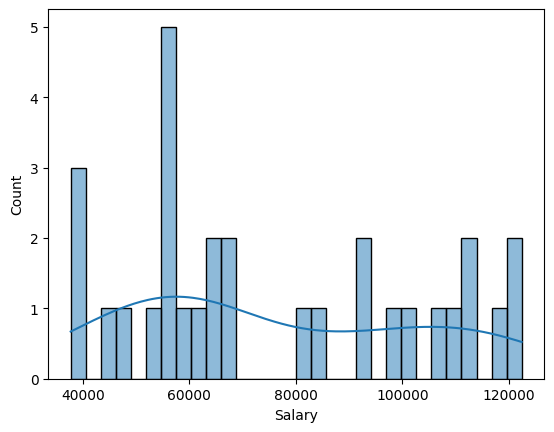

In [15]:
sns.histplot(data["Salary"], bins=30, kde=True)
plt.show()

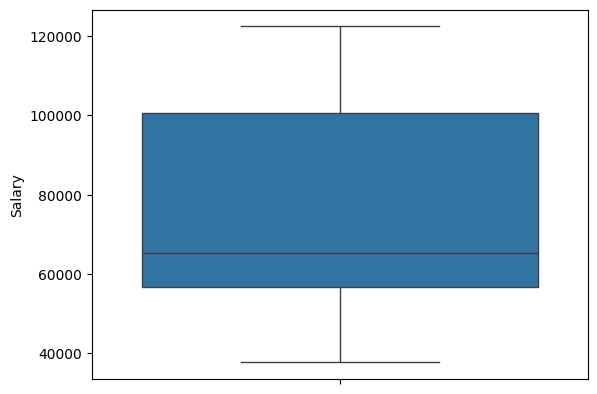

In [16]:
sns.boxplot(y=data["Salary"])
plt.show()

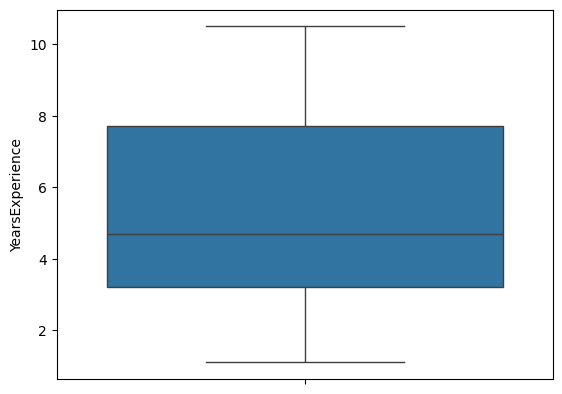

In [17]:
sns.boxplot(y=data["YearsExperience"])
plt.show()

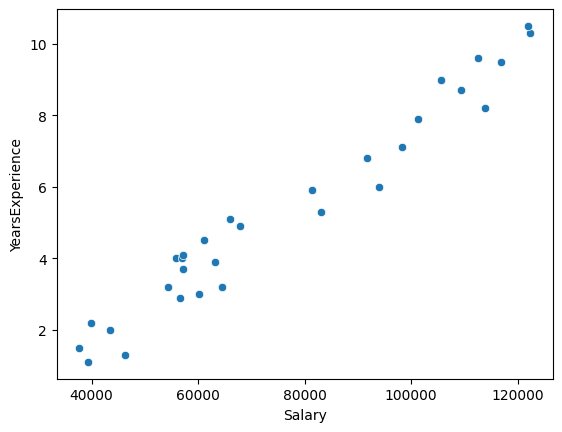

In [18]:
sns.scatterplot(x=data["Salary"], y=data["YearsExperience"])
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn import metrics

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

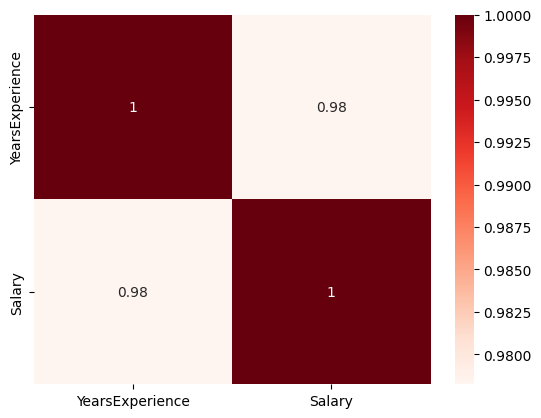

In [23]:
sns.heatmap(data.corr(),annot=True,cmap='Reds')

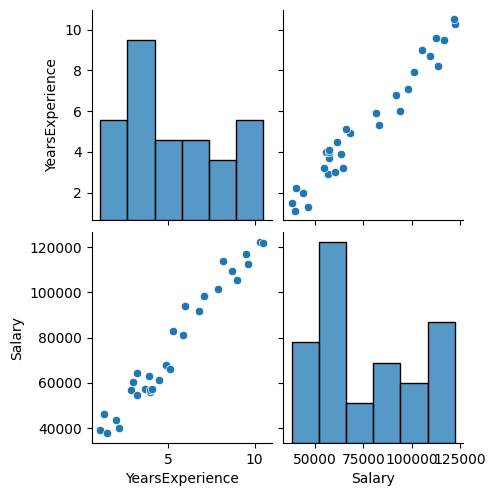

In [24]:
sns.pairplot(data)

In [25]:
X=data[['YearsExperience']]

In [26]:
X.shape

(30, 1)

In [27]:
y=data['Salary']

In [28]:
y.shape

(30,)

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
X_train.shape

(24, 1)

In [31]:
X_test.shape

(6, 1)

In [32]:
model=LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
model.coef_

array([9423.81532303])

In [35]:
y_pred=model.predict(X_test)

In [36]:
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [37]:
from sklearn.metrics import  mean_squared_error,r2_score

In [38]:
MSE = mean_squared_error(y_test,y_pred)
print(f"The mean square error of model is {MSE}")
print(f"The root mean square error of model is {np.sqrt(MSE)}")

The mean square error of model is 49830096.85590839
The root mean square error of model is 7059.04362190151


In [39]:
performance=r2_score(y_test,y_pred)
print(f"The r_2 score of the model is {performance}")

The r_2 score of the model is 0.9024461774180497


In [40]:
test_residual=y_test-y_pred

In [41]:
test_residual

27    -3155.210113
15    -3560.278095
23    11215.131339
17     7820.195776
8      8967.207955
9     -3000.699707
Name: Salary, dtype: float64

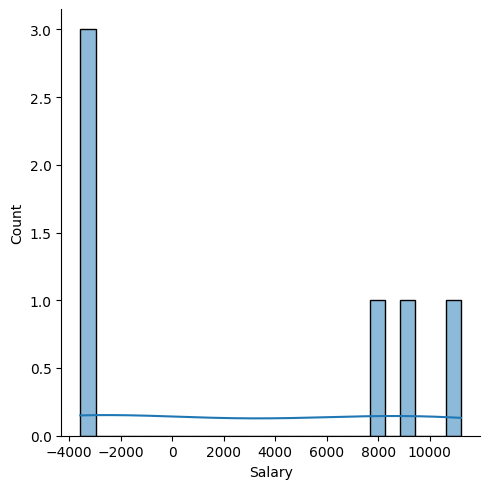

In [42]:
sns.displot(test_residual,bins=25,kde=True)

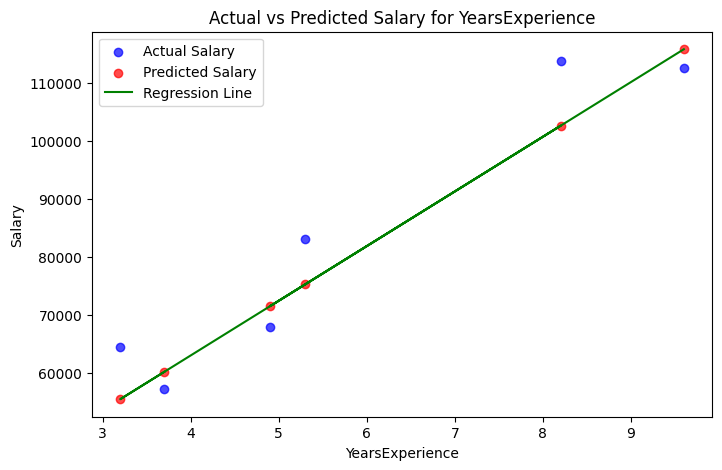

In [43]:
# let's plot this to check how well is this working 
plt.figure(figsize=(8, 5))

# Plotting each feature in X_test against y_test and y_predicted
for i, feature in enumerate(X_test.columns):
	plt.scatter(X_test[feature], y_test, color='blue', label='Actual Salary', alpha=0.7)
	plt.scatter(X_test[feature], y_pred, color='red', label='Predicted Salary', alpha=0.7)
	plt.plot(X_test[feature], y_pred, color='green', label='Regression Line')
	plt.title(f'Actual vs Predicted Salary for {feature}')
	plt.xlabel(feature)
	plt.ylabel('Salary')
	plt.legend()
	plt.show()